# Problem definition

In [1]:
using GeoStats
using Plots; gr(size=(950,200))

geodata = PointSetData(Dict(:porosity => randn(200)), [100*rand(200) 100*rand(200)]')

domain = RegularGrid{Float64}(100, 100)

condsim = SimulationProblem(geodata, domain, :porosity, 100)
uncondsim = SimulationProblem(domain, :porosity => Float64, 100)

2D SimulationProblem (unconditional)
  domain:    100×100 RegularGrid{Float64,2}
  variables: porosity (Float64)
  N° reals:  100

# Solver options

The user can specify a variogram model:

In [2]:
using DirectGaussianSimulation

solver₁ = DirectGaussSim(:porosity => (variogram=SphericalVariogram(range=35.),))
solver₂ = DirectGaussSim(:porosity => (variogram=ExponentialVariogram(range=35.),))

solutions = [solve(condsim, solver) for solver in (solver₁, solver₂)]

2-element Array{SimulationSolution{RegularGrid{Float64,2}},1}:
 2D SimulationSolution
 2D SimulationSolution

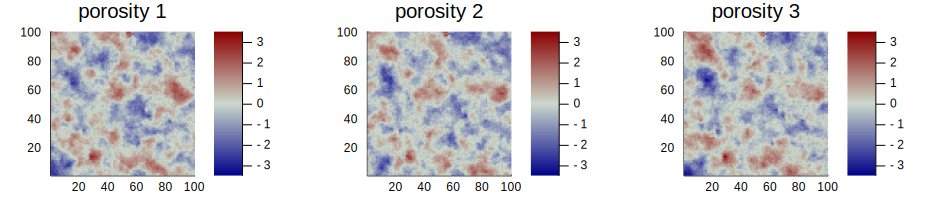

In [3]:
plot(solutions[1])

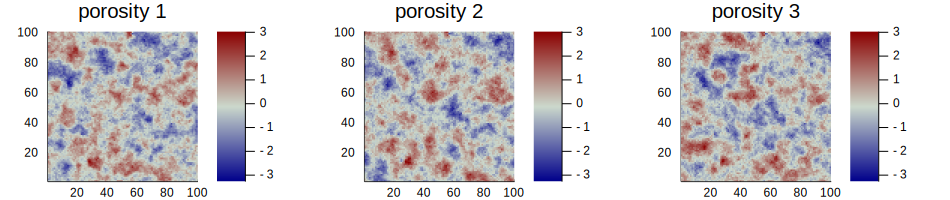

In [4]:
plot(solutions[2])

and in case of unconditional simulation, the mean can also be specified:

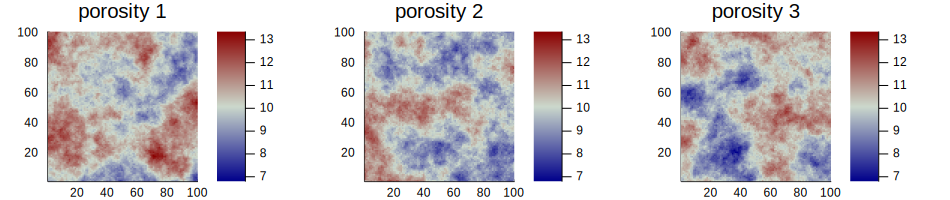

In [5]:
solver = DirectGaussSim(:porosity => (variogram=SphericalVariogram(range=35.),mean=10.))

solution = solve(uncondsim, solver)

plot(solution)